# IMPORT ALL REQUIRED LIBRARIES AND LOAD DATASET

## Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
nadp = pd.read_csv("C:\\Users\\saina\\Desktop\\DS_ML_AI\\Scaler\\Projects_or_Case_Studies_GIT\\Network_Anomaly_Detection_Project\\Datasets\\Network_anomaly_data.csv")

# BASIC EXPLORATORY DATA ANALYSIS

## First 5 rows

In [3]:
nadp.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


**Observations**
> 43 columns are present in the data

## Info

In [4]:
nadp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

**Observations**
> Out of 43 Columns, there are 15 float64 type columns, 24 int64 type columns, 4 object(String) type columns

> Dataset size is 41.3 MB

>   Total Number of rows are 125973.

>   It looks like there are no null values in any column. (Should check) 

## Null Value Detection

In [5]:
nadp.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [6]:
sum(nadp.isna().sum())

0

**Observations**
> There are no null values in the dataset. 

## Nunique of all columns

In [7]:
for i in nadp.columns:
    print(f"{i:<25} :   {nadp[i].nunique()}")

duration                  :   2981
protocoltype              :   3
service                   :   70
flag                      :   11
srcbytes                  :   3341
dstbytes                  :   9326
land                      :   2
wrongfragment             :   3
urgent                    :   4
hot                       :   28
numfailedlogins           :   6
loggedin                  :   2
numcompromised            :   88
rootshell                 :   2
suattempted               :   3
numroot                   :   82
numfilecreations          :   35
numshells                 :   3
numaccessfiles            :   10
numoutboundcmds           :   1
ishostlogin               :   2
isguestlogin              :   2
count                     :   512
srvcount                  :   509
serrorrate                :   89
srvserrorrate             :   86
rerrorrate                :   82
srvrerrorrate             :   62
samesrvrate               :   101
diffsrvrate               :   95
srvdiffhostra

**Observations**
> Most of the columns have int and float data types, so for most of the columns, the number of unique values are greater than 50

> Can check unique values for columns with nunique <= 50, to identify whether they are (continuous or discrete) and (nominal or ordinal)  

## Function to display all rows and columns

In [8]:
def display_all(df):     # For any Dataframe df
   with pd.option_context('display.max_rows',100): # Change number of rows accordingly
      with pd.option_context('display.max_columns',100): # Change number of columns accordingly
          display(df)

In [9]:
display_all(nadp.head())

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


**Observations**
> Use display_all function whenever there is a need to print all the columns or rows.

## Unique values of columns with nunique <= 50

In [10]:
for i in nadp.columns:
    if nadp[i].nunique() <= 50:
        print(f"{i}")
        print(f"{nadp[i].unique()}")
        print()

protocoltype
['tcp' 'udp' 'icmp']

flag
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']

land
[0 1]

wrongfragment
[0 3 1]

urgent
[0 1 3 2]

hot
[ 0  5  6  4  2  1 28 30 22 24 14  3 15 25 19 18 77 17 11  7 20 12  9 10
  8 21 33 44]

numfailedlogins
[0 2 1 3 4 5]

loggedin
[0 1]

rootshell
[0 1]

suattempted
[0 1 2]

numfilecreations
[ 0  1  8  4  2 15 13 29 19 18  6 14  5 21 17 40  3 20 11 38 23 10 27 25
 12 16 28 26  7  9 33 22 43 36 34]

numshells
[0 1 2]

numaccessfiles
[0 1 2 3 5 4 8 6 7 9]

numoutboundcmds
[0]

ishostlogin
[0 1]

isguestlogin
[0 1]

attack
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']

lastflag
[20 15 19 21 18 17 16 12 14 11  2 13 10  9  8  7  3  5  1  6  0  4]



**Observation**
> **SHOULD COMMENT HERE AFTER UNDERSTANDING ABOUT EVERY COLUMN** 

## Descriptive statistics

In [11]:
display_all(nadp.describe())

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
display_all(nadp.describe(include="object"))

,protocoltype,service,flag,attack
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


**Observations**
> For most of the columns have min, 25th, 50th, 75th percentile as zeros. Only the max value is present. So those columns will have the many outliers in box plot.

## Duplicates Check

In [13]:
nadp.duplicated().sum()

0

In [14]:
nadp["duration"].describe()

count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
Name: duration, dtype: float64

In [15]:
nadp["service"].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [16]:
nadp["srcbytes"].describe()

count    1.259730e+05
mean     4.556674e+04
std      5.870331e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      2.760000e+02
max      1.379964e+09
Name: srcbytes, dtype: float64

In [17]:
nadp["dstbytes"].describe()

count    1.259730e+05
mean     1.977911e+04
std      4.021269e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.160000e+02
max      1.309937e+09
Name: dstbytes, dtype: float64

In [18]:
nadp["land"].value_counts()

land
0    125948
1        25
Name: count, dtype: int64

In [19]:
nadp["wrongfragment"].value_counts()

wrongfragment
0    124883
3       884
1       206
Name: count, dtype: int64

In [20]:
nadp.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [21]:
for i in nadp.columns:
    print(i)
    print(nadp[i].value_counts())
    print()
    

duration
duration
0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: count, Length: 2981, dtype: int64

protocoltype
protocoltype
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

service
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

flag
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

srcbytes
srcbytes
0        49392
8         3691
1         2432
44        2334
45        2089
         ...  
1940         1
12973        1
1899         1
1661         1
2358         1
Name: c

In [22]:
nadp["hot"].value_counts()

hot
0     123302
2       1037
1        369
28       277
30       256
4        173
6        140
5         76
24        68
19        57
22        55
3         54
18        45
14        30
20         9
7          5
15         4
11         3
25         2
9          2
44         2
77         1
17         1
12         1
10         1
8          1
21         1
33         1
Name: count, dtype: int64

In [23]:
nadp["numcompromised"].unique()

array([   0,    3,    2,    1,   19,    5,    4,   38,  107,  462,  110,
          6,  151,    7,   31,    9,  157,   13,  558,   12,  371,  217,
         83,  193,  789,  520,  884,  457,  767,  756,   21,   10,  281,
         23,   44,  622,   18,   15,  716,  202,  121,  682,  537,  345,
         17,    8,  166, 7479,  307,   40,  405,  751,   54,  761,  102,
        237,  456,   22,  809,  198,   37,   75,  378,   16, 1739,  174,
         46,   74,  543,  691,   94,  676,  175,  373,   14,   78, 1043,
        177,  247,  538,  187,  407,  258,  568,  349,  452,  375,   11],
      dtype=int64)

In [24]:
nadp["numcompromised"].value_counts()

numcompromised
0       124687
1          976
2           98
4           40
3           38
         ...  
7479         1
307          1
40           1
405          1
11           1
Name: count, Length: 88, dtype: int64

In [25]:
nadp["numfilecreations"].value_counts()

numfilecreations
0     125686
1        151
2         41
4         13
3          5
8          5
15         5
10         5
5          5
17         5
7          4
12         4
18         4
11         4
26         3
25         3
20         3
40         3
14         3
6          3
13         2
23         2
9          2
36         1
43         1
22         1
33         1
28         1
29         1
21         1
16         1
19         1
27         1
38         1
34         1
Name: count, dtype: int64

In [26]:
nadp['count'].value_counts()

count
1      27763
2       9474
3       3962
4       3550
5       2980
       ...  
413        4
498        4
504        3
506        3
505        2
Name: count, Length: 512, dtype: int64

In [27]:
nadp['srvcount'].value_counts()

srvcount
1      25398
2      12820
3       6336
4       5526
5       4636
       ...  
407        2
413        1
503        1
501        1
498        1
Name: count, Length: 509, dtype: int64

In [28]:
nadp.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [29]:
(nadp["samesrvrate"]+nadp["diffsrvrate"]).unique()

array([1.  , 0.23, 0.12, 0.22, 0.11, 0.2 , 0.14, 0.12, 0.08, 0.06, 0.22,
       0.15, 0.07, 0.09, 0.35, 1.5 , 0.13, 0.3 , 0.18, 0.17, 0.58, 1.01,
       0.24, 0.45, 0.17, 1.34, 0.1 , 0.16, 0.75, 0.07, 0.62, 0.25, 0.38,
       0.23, 0.06, 0.95, 0.36, 1.03, 0.21, 0.24, 0.11, 0.52, 0.15, 0.44,
       0.09, 0.72, 0.27, 0.33, 0.5 , 0.21, 0.34, 0.47, 0.19, 1.33, 0.43,
       0.57, 0.28, 0.6 , 0.33, 0.48, 0.32, 0.39, 0.51, 0.42, 0.37, 0.41,
       0.83, 0.3 , 0.59, 0.55, 1.12, 1.02, 0.31, 0.89, 0.1 , 0.93, 0.63,
       0.86, 1.04, 0.53, 0.61, 0.05, 0.42, 1.2 , 0.79, 1.13, 0.54, 0.35,
       0.68, 0.97, 0.77, 0.46, 0.84, 0.86, 0.86, 0.92, 0.45, 1.25, 0.96,
       0.26, 0.59, 0.34, 0.43, 0.84, 0.58, 0.56, 0.7 , 0.9 , 0.66, 0.94,
       0.68, 0.29, 0.6 , 0.8 , 0.41, 0.47, 0.4 , 0.39, 0.67, 0.64, 0.99,
       0.91, 0.93, 1.16, 1.11, 0.67, 0.62, 0.64, 0.82, 0.73, 1.05, 1.17,
       0.18, 1.08, 0.49, 0.87, 0.88, 0.69, 1.06, 0.44, 0.03, 0.71, 0.48,
       0.9 , 0.89, 0.92, 0.4 , 0.29, 0.  , 0.28, 0.

In [30]:
display_all(nadp.head())

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [31]:
nadp["lastflag"].unique()

array([20, 15, 19, 21, 18, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4], dtype=int64)

In [32]:
nadp["lastflag"].value_counts()

lastflag
21    62557
18    20667
20    19339
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: count, dtype: int64

In [33]:
nadp.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [34]:
nadp["flag"].value_counts()

flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

In [35]:
from sklearn.datasets import fetch_kddcup99

In [36]:
df = fetch_kddcup99()

In [37]:
df['feature_names']

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
isinstance(nadp["attack"],object)

True

In [40]:
df = nadp.copy(deep=True)

In [41]:
for i in df.columns:
    if isinstance(df[i],object):
        df[i] = le.fit_transform(df[i])

In [42]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,1,20,9,482,0,0,0,0,0,...,17,3,17,0,0,0,5,0,11,20
1,0,2,44,9,143,0,0,0,0,0,...,0,60,88,0,0,0,0,0,11,15
2,0,1,49,5,0,0,0,0,0,0,...,10,5,0,0,100,99,0,0,9,19
3,0,1,24,9,229,5608,0,0,0,0,...,100,0,3,4,3,1,0,1,11,21
4,0,1,24,9,196,405,0,0,0,0,...,100,0,0,0,0,0,0,0,11,21


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)

In [44]:
df = pd.DataFrame(df)

In [45]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.144751,-0.124706,-0.686785,0.751111,0.335137,-0.466260,-0.014089,-0.091298,-0.007736,-0.098834,...,-0.782367,-0.280282,0.069972,-0.307619,-0.639532,-0.624942,-0.224532,-0.376387,0.142074,0.216426
1,-0.144751,2.219312,0.781428,0.751111,-0.233107,-0.466260,-0.014089,-0.091298,-0.007736,-0.098834,...,-1.161030,2.736852,2.367737,-0.307619,-0.639532,-0.624942,-0.387635,-0.376387,0.142074,-1.965556
2,-0.144751,-0.124706,1.087305,-0.736235,-0.472809,-0.466260,-0.014089,-0.091298,-0.007736,-0.098834,...,-0.938287,-0.174417,-0.480197,-0.307619,1.608759,1.618606,-0.387635,-0.376387,-0.616630,-0.219970
3,-0.144751,-0.124706,-0.442083,0.751111,-0.088951,2.583574,-0.014089,-0.091298,-0.007736,-0.098834,...,1.066401,-0.439078,-0.383108,0.088765,-0.572083,-0.602280,-0.387635,-0.345084,0.142074,0.652823
4,-0.144751,-0.124706,-0.442083,0.751111,-0.144267,-0.246007,-0.014089,-0.091298,-0.007736,-0.098834,...,1.066401,-0.439078,-0.480197,-0.307619,-0.639532,-0.624942,-0.387635,-0.376387,0.142074,0.652823


KeyError: "['lastflag'] not in index"

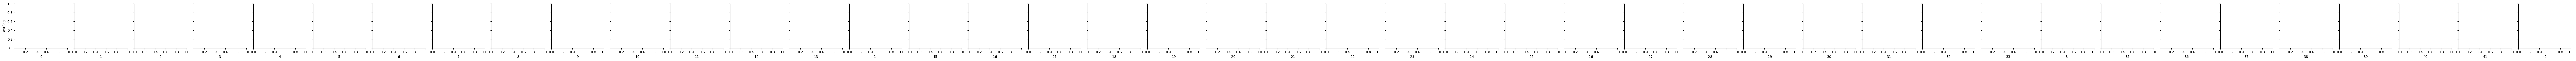

In [46]:
sns.pairplot(df,y_vars=["lastflag"])

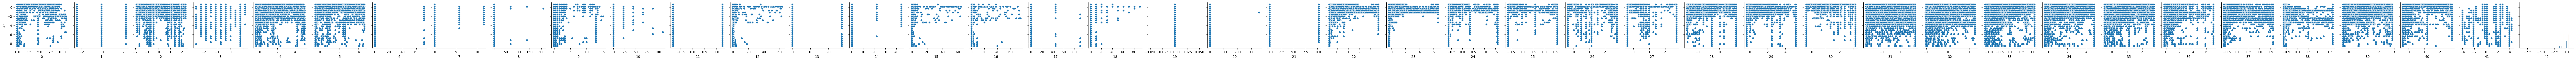

In [47]:
sns.pairplot(df,y_vars=[42])

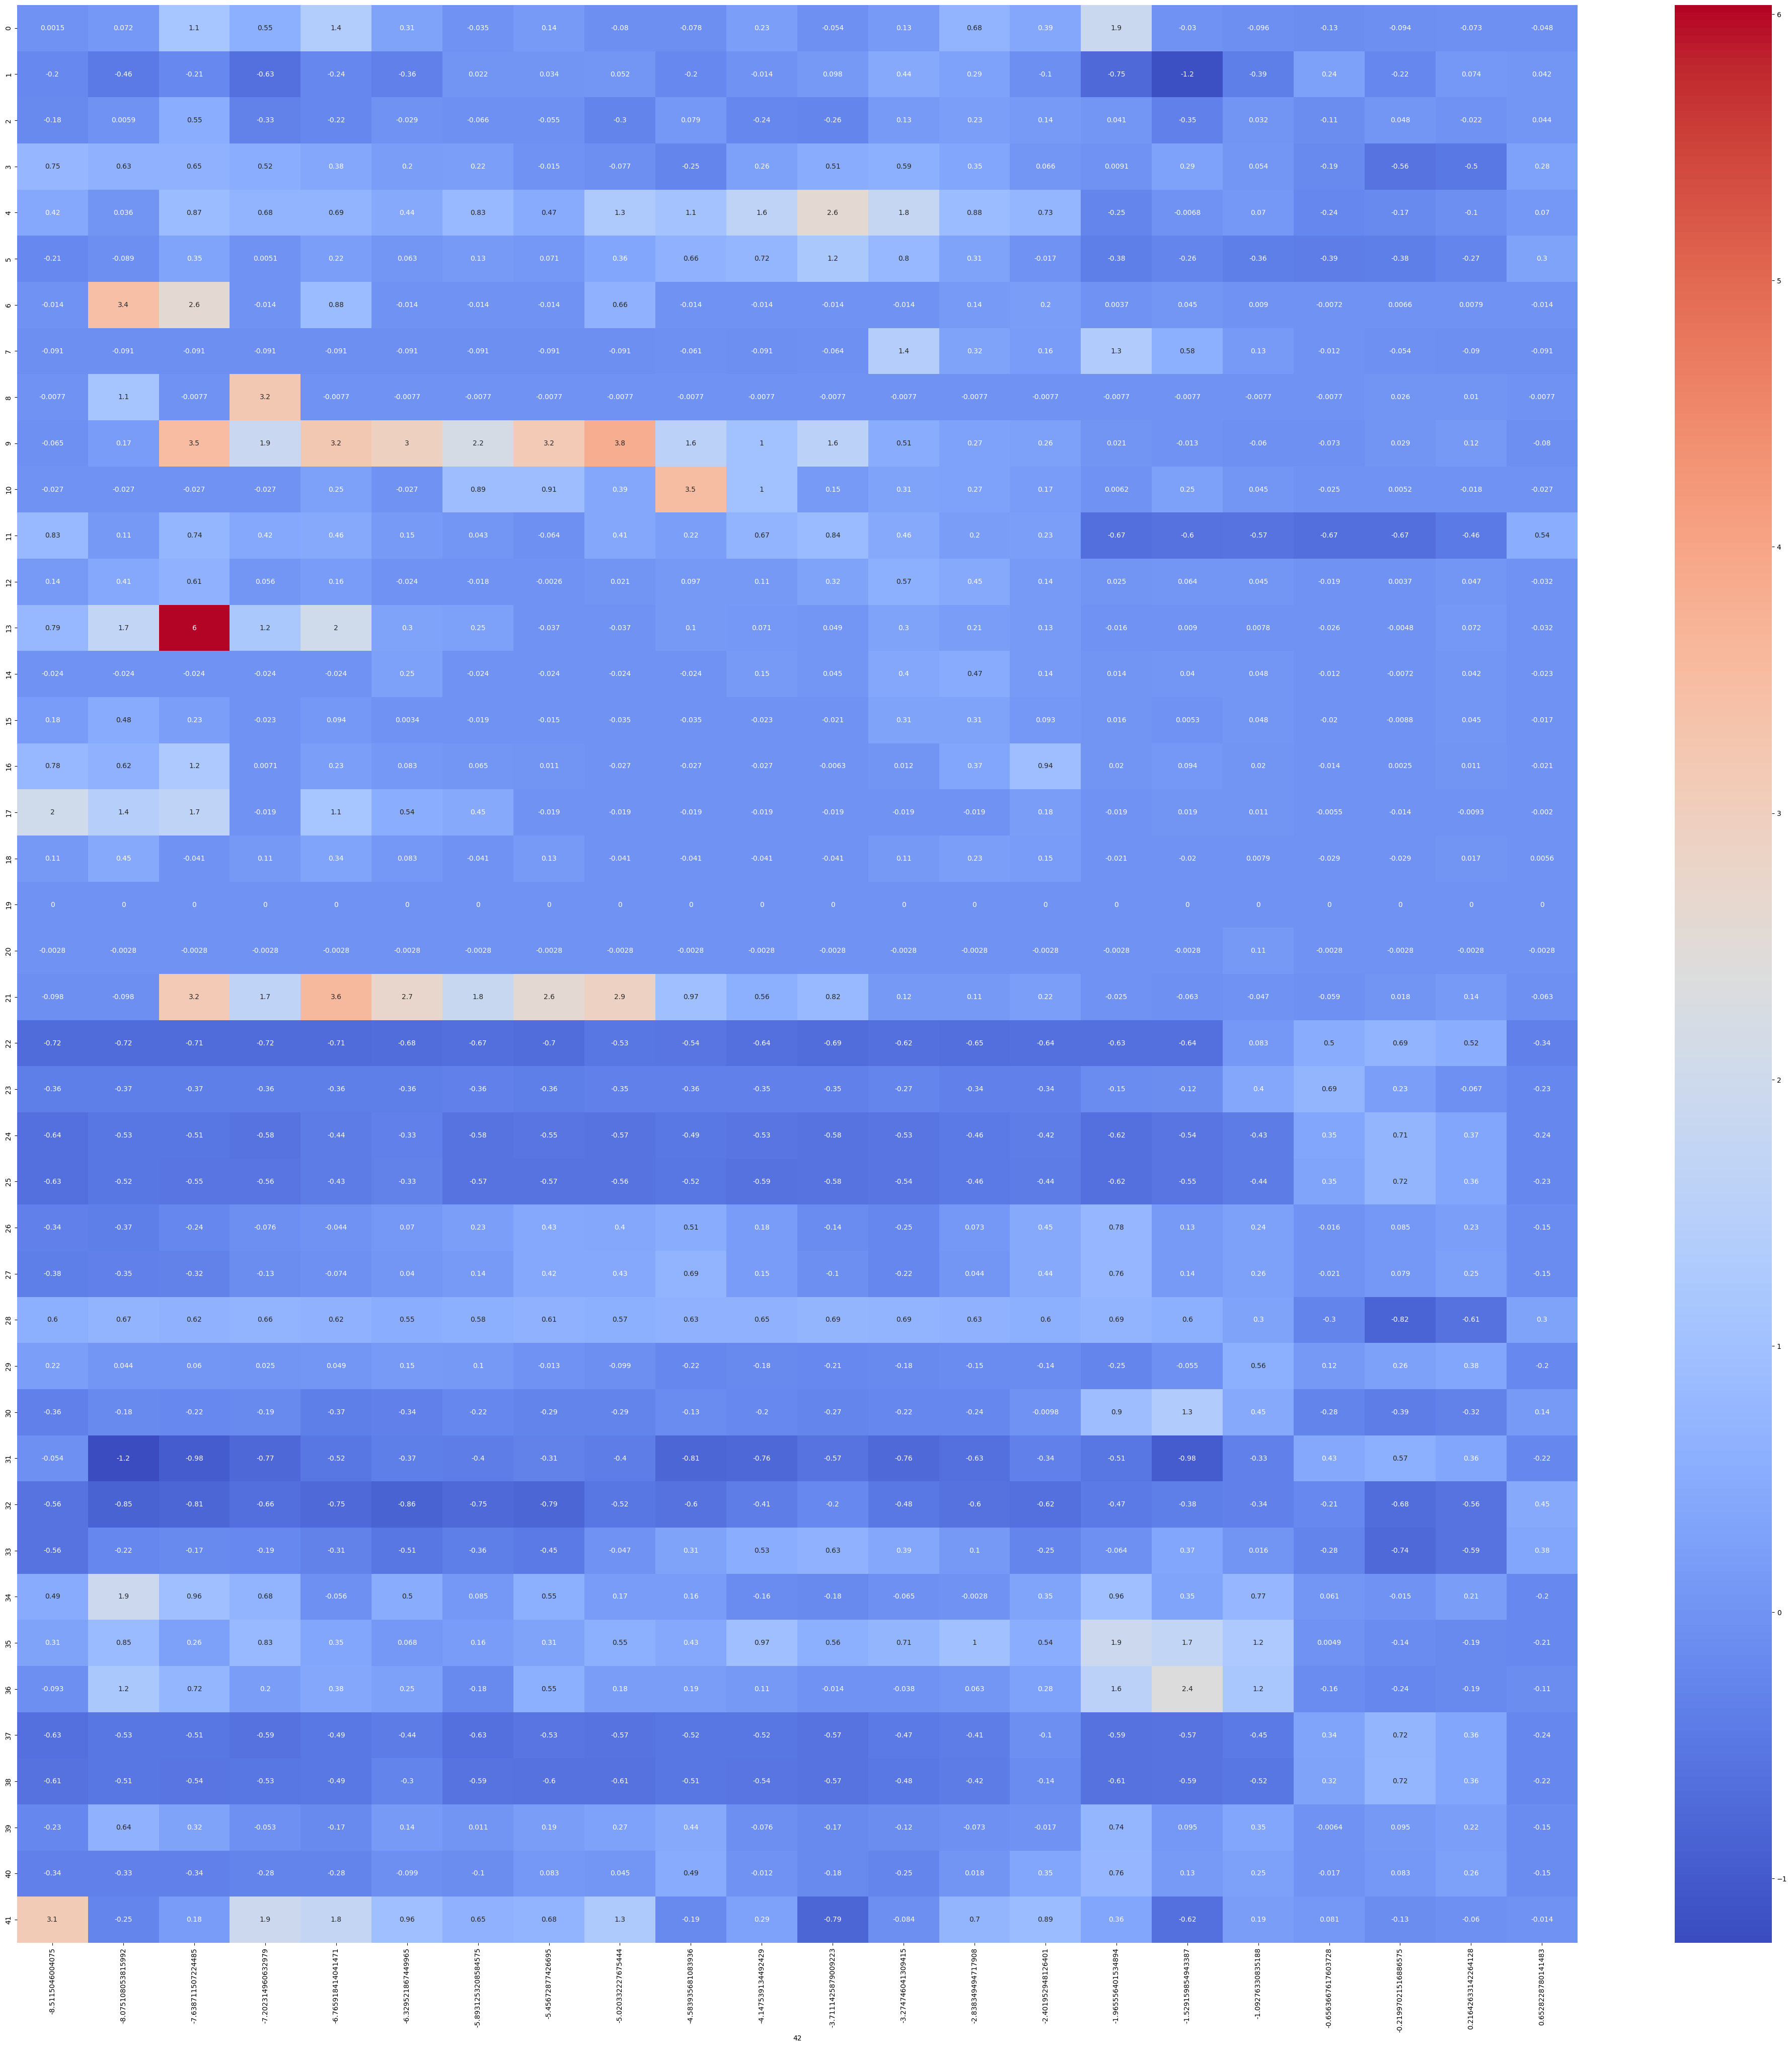

In [48]:
plt.figure(figsize=(50,50))
grouped_data = df.groupby(42).mean()

# Plotting the heatmap
sns.heatmap(grouped_data.T, annot=True, cmap="coolwarm")  # Transposing to get 'last_flag' on y-axis
plt.show()

<Axes: >

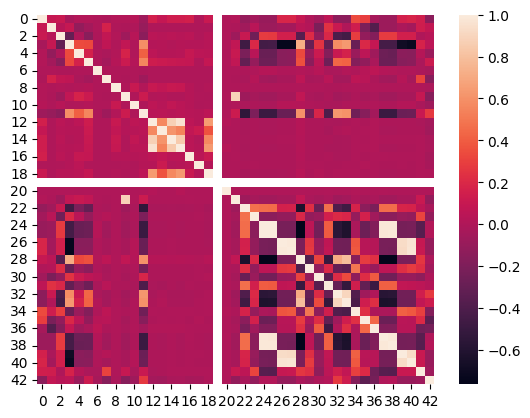

In [49]:
sns.heatmap(df.corr())

In [50]:
help(df.corr)

Help on method corr in module pandas.core.frame:

corr(method: 'CorrelationMethod' = 'pearson', min_periods: 'int' = 1, numeric_only: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.

    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:

        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and Spearman 

In [51]:
help

Type help() for interactive help, or help(object) for help about object.

In [52]:
sns.heatmap(df.corr(x_vars = , ))

SyntaxError: expected argument value expression (875645976.py, line 1)

In [54]:
nadp.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [55]:
df1 = nadp[['count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate']]

<Axes: >

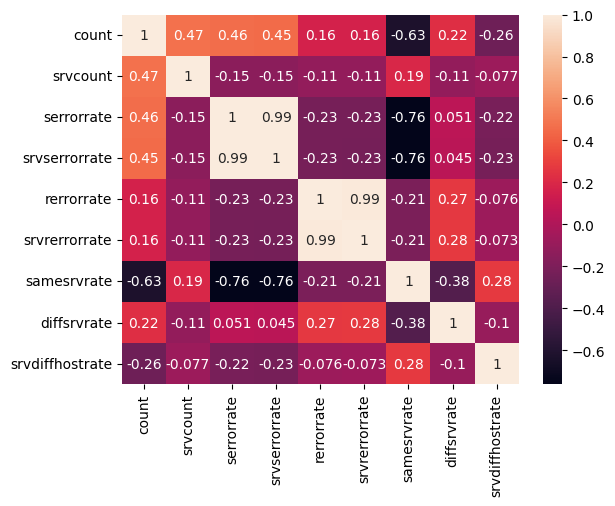

In [57]:
sns.heatmap(df1.corr(),annot=True)

<Axes: >

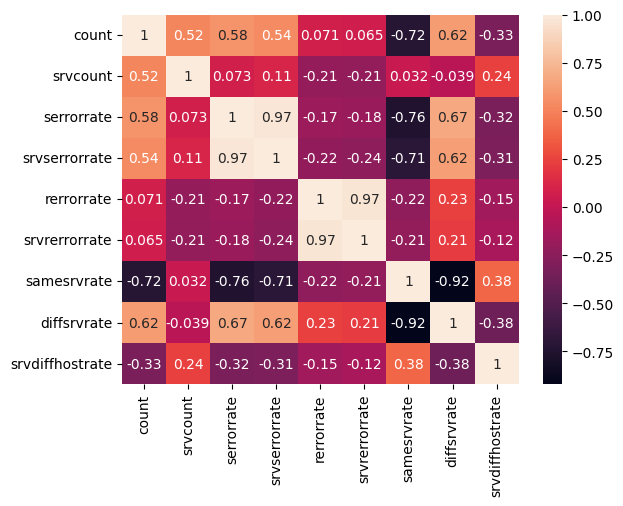

In [58]:
sns.heatmap(df1.corr(method= "spearman"),annot=True)